# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [200]:
import pandas as pd
import numpy as np


### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [201]:
#load the dataset.
pew_df = pd.read_csv("pew-raw.csv")
pew_df.head()


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


### We loaded the pew pew dataset using read_csv, and showed the first few rows to understand the structure.

2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [202]:

print("Using .head():")
print(pew_df.head())

print("\nUsing .tail():")
print(pew_df.tail())

print("\nUsing .iloc[0]:")
print(pew_df.iloc[0])


Using .head():
            religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  $50-75k
0           Agnostic      27        34       60       81        76      137
1            Atheist      12        27       37       52        35       70
2           Buddhist      27        21       30       34        33       58
3           Catholic     418       617      732      670       638     1116
4  Dont know/refused      15        14       15       11        10       35

Using .tail():
                   religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  \
5         Evangelical Prot      575       869     1064      982       881   
6                    Hindu        1         9        7        9        11   
7  Historically Black Prot      228       244      236      238       197   
8         Jehovahs Witness       20        27       24       24        21   
9                   Jewish       19        19       25       25        30   

   $50-75k  
5     1486  
6       34  
7      223 

### We used these head(), iloc(), tail() to find how data was stored. The column names shows to be in the values like year, and this was not tidy. 

***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [203]:

pew_tidy = pd.melt(pew_df, id_vars=["religion"], var_name="income", value_name="frequency")
pew_tidy.head()


,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15


### We have used pd.melt to reshape the data. Where religion stays like ID variable, counts were placed under frequency column and all the income levels now become row values in income column




### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [204]:

billboard_df = pd.read_csv("billboard.csv", encoding="unicode_escape")
billboard_df.head()


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We read the bill board data set using encoding= unicode escape to handle the non standard characters.
### After that showed the top rows using head function to understand its structure.




2. Observe the first few rows of the dataset.

In [205]:

print(billboard_df.info())
print(billboard_df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             317 non-null    int64  
 1   artist.inverted  317 non-null    object 
 2   track            317 non-null    object 
 3   time             317 non-null    object 
 4   genre            317 non-null    object 
 5   date.entered     317 non-null    object 
 6   date.peaked      317 non-null    object 
 7   x1st.week        317 non-null    int64  
 8   x2nd.week        312 non-null    float64
 9   x3rd.week        307 non-null    float64
 10  x4th.week        300 non-null    float64
 11  x5th.week        292 non-null    float64
 12  x6th.week        280 non-null    float64
 13  x7th.week        269 non-null    float64
 14  x8th.week        260 non-null    float64
 15  x9th.week        253 non-null    float64
 16  x10th.week       244 non-null    float64
 17  x11th.week      

***What is wrong with the above dataset?***

#### We have observed that this dataset has columns for artist, track, time, and multiple week columns, for example: x1stweek, x2nd.week. Which we should be ideally converted into rows for proper structure.


3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [206]:

billboard_melted = pd.melt(billboard_df,
                           id_vars=['year', 'artist.inverted', 'track', 'time', 'genre'],
                           var_name='week',
                           value_name='rank')
billboard_melted.head()


,year,artist.inverted,track,time,genre,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,date.entered,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,date.entered,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,date.entered,1999-10-23
3,2000,Madonna,Music,3:45,Rock,date.entered,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,date.entered,2000-08-05


### We have used melt function to transform the multiple week colums to two columns- 
### Week : the name of the original week column, and 
#### Rank : the chart position of the song in that week. This makes the dataset tidy and easier to analyze






If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [207]:

billboard_melted['week'] = billboard_melted['week'].str.extract('(\d+)').astype(float)
billboard_melted.head()


,year,artist.inverted,track,time,genre,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,NaN,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,NaN,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,NaN,1999-10-23
3,2000,Madonna,Music,3:45,Rock,NaN,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,NaN,2000-08-05


### We have cleaned the weel column using regular expressions to extract the numeric week value, and this has removed extra characters like x1stweek to 1





5. Now let's inspect the ***Week*** column in the dataframe.

In [208]:

# Removing the rows with missing week values
billboard_melted = billboard_melted.dropna(subset=['week'])

# Converting the 'week' into number of days 
billboard_melted['days_since_start'] = pd.to_timedelta(billboard_melted['week'] * 7, unit='D')

# Set a base date 
billboard_melted['start_date'] = pd.to_datetime('2000-01-01')

# Option 2 (Advanced): use year from data
# billboard_melted['start_date'] = pd.to_datetime(billboard_melted['year'].astype(int).astype(str) + "-01-01")

# Calculate final chart date
billboard_melted['chart_date'] = billboard_melted['start_date'] + billboard_melted['days_since_start']

# Display result
billboard_melted[['artist.inverted', 'track', 'week', 'chart_date']].head()


,artist.inverted,track,week,chart_date
634,Destiny's Child,Independent Women Part I,1.0,2000-01-08
635,Santana,"Maria, Maria",1.0,2000-01-08
636,Savage Garden,I Knew I Loved You,1.0,2000-01-08
637,Madonna,Music,1.0,2000-01-08
638,"Aguilera, Christina",Come On Over Baby (All I Want Is You),1.0,2000-01-08


### we removed rows where week is missing to avoid errors during date calculations and we also converted all the week numbers into the time delta and added it the base date which is 2000-01-01, to get the actual chart-date for each song weekly ranking



Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



In [209]:
import pandas as pd

start_date = pd.to_datetime('2000-01-01')
week = 3

# Correct way: multiply week * 7 and convert to timedelta
chart_date = start_date + pd.to_timedelta(week * 7, unit='D')
print(chart_date)


2000-01-22 00:00:00


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

In [210]:
# Clean week column: remove rows with missing week
billboard_melted = billboard_melted.dropna(subset=['week'])

# Convert week into days
billboard_melted['days_since_start'] = pd.to_timedelta(billboard_melted['week'] * 7, unit='D')

# Use Jan 1, 2000 as the fixed start date
billboard_melted['start_date'] = pd.to_datetime('2000-01-01')

# Calculate chart date
billboard_melted['chart_date'] = billboard_melted['start_date'] + billboard_melted['days_since_start']

# Display cleaned result
billboard_melted[['artist.inverted', 'track', 'week', 'chart_date']].head()


,artist.inverted,track,week,chart_date
634,Destiny's Child,Independent Women Part I,1.0,2000-01-08
635,Santana,"Maria, Maria",1.0,2000-01-08
636,Savage Garden,I Knew I Loved You,1.0,2000-01-08
637,Madonna,Music,1.0,2000-01-08
638,"Aguilera, Christina",Come On Over Baby (All I Want Is You),1.0,2000-01-08


7. Let's only keep necessary columns

In [211]:
billboard_melted = billboard_melted[['artist.inverted', 'track', 'week', 'rank', 'chart_date']]
billboard_melted.head()


,artist.inverted,track,week,rank,chart_date
634,Destiny's Child,Independent Women Part I,1.0,78,2000-01-08
635,Santana,"Maria, Maria",1.0,15,2000-01-08
636,Savage Garden,I Knew I Loved You,1.0,71,2000-01-08
637,Madonna,Music,1.0,41,2000-01-08
638,"Aguilera, Christina",Come On Over Baby (All I Want Is You),1.0,57,2000-01-08


8. How to rename your columns?

In [212]:
billboard_melted = billboard_melted.rename(columns={
    'artist.inverted': 'artist',
    'track': 'song'
})
billboard_melted.head()


,artist,song,week,rank,chart_date
634,Destiny's Child,Independent Women Part I,1.0,78,2000-01-08
635,Santana,"Maria, Maria",1.0,15,2000-01-08
636,Savage Garden,I Knew I Loved You,1.0,71,2000-01-08
637,Madonna,Music,1.0,41,2000-01-08
638,"Aguilera, Christina",Come On Over Baby (All I Want Is You),1.0,57,2000-01-08


Display the dataframe

In [213]:
billboard_melted = billboard_melted.rename(columns={
    'artist.inverted': 'artist',
    'track': 'song'
})
billboard_melted.head()


,artist,song,week,rank,chart_date
634,Destiny's Child,Independent Women Part I,1.0,78,2000-01-08
635,Santana,"Maria, Maria",1.0,15,2000-01-08
636,Savage Garden,I Knew I Loved You,1.0,71,2000-01-08
637,Madonna,Music,1.0,41,2000-01-08
638,"Aguilera, Christina",Come On Over Baby (All I Want Is You),1.0,57,2000-01-08


In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [214]:
billboard_melted = billboard_melted.dropna()
billboard_melted.head()


,artist,song,week,rank,chart_date
634,Destiny's Child,Independent Women Part I,1.0,78,2000-01-08
635,Santana,"Maria, Maria",1.0,15,2000-01-08
636,Savage Garden,I Knew I Loved You,1.0,71,2000-01-08
637,Madonna,Music,1.0,41,2000-01-08
638,"Aguilera, Christina",Come On Over Baby (All I Want Is You),1.0,57,2000-01-08


## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [215]:
import pandas as pd

# Load the dataset
cars_df = pd.read_csv('cars.csv', sep=';')


# Display first 5 rows
cars_df.head()


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US


First Row seems to be the datatype, we need to remove it

In [216]:
# Remove the first row
cars_df = cars_df.drop(index=0).reset_index(drop=True)


Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [217]:
# columns with missing values
cars_df.isnull().sum()


Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [218]:
# Calculate the percentage of missing values in each column
missing_percent = (cars_df.isnull().sum() / len(cars_df)) * 100
missing_percent


Car             0.000000
MPG             0.738916
Cylinders       0.000000
Displacement    0.246305
Horsepower      0.492611
Weight          0.246305
Acceleration    0.000000
Model           0.000000
Origin          0.000000
dtype: float64

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [219]:
# Remove rows with any missing values
cars_df_cleaned = cars_df.dropna()
cars_df_cleaned.shape


(401, 9)

Lets also check dropping the columns

In [220]:
# dropped the columns
dropped_cols = cars_df.columns[cars_df.isnull().sum() > 0]
print("Columns that would be dropped:", list(dropped_cols))


Columns that would be dropped: ['MPG', 'Displacement', 'Horsepower', 'Weight']


Let's observe how many columns we lost

In [221]:
#columns lost
original_cols = cars_df.shape[1]
cleaned_cols = cars_df_cleaned.shape[1]
print(f"Original columns: {original_cols}, After dropna(): {cleaned_cols}")


Original columns: 9, After dropna(): 9


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

In [222]:
# This method works but doesn't make logical sense for MPG
cars_df['MPG'].fillna(0, inplace=True)


However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

In [223]:
# Convert 'MPG' column to numeric, coercing errors
cars_df['MPG'] = pd.to_numeric(cars_df['MPG'], errors='coerce')


If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

In [224]:
# Fill missing MPG values with the mean
mean_mpg = cars_df['MPG'].mean()
cars_df['MPG'].fillna(mean_mpg, inplace=True)


To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [225]:
# converting 'MPG' to numeric
cars_df['MPG'] = pd.to_numeric(cars_df['MPG'], errors='coerce')


Now let's see what is the mean of the MPG column

In [226]:
# finding the mean of 'MPG'
mean_mpg = cars_df['MPG'].mean()
print("Mean of MPG:", mean_mpg)


Mean of MPG: 22.925615763546798


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [227]:
# computing the mean of 'MPG' 

cars_df['MPG'].fillna(mean_mpg, inplace=True)
cars_df.head()


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,0.0,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,0.0,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


In [228]:
from sklearn.impute import SimpleImputer



Let's start by importing the `SimpleImputer` into our notebook

In [229]:
from sklearn.impute import SimpleImputer



What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [230]:
# two essential imports
imputer = SimpleImputer(strategy='mean')  
cars_df[['MPG']] = imputer.fit_transform(cars_df[['MPG']])  


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

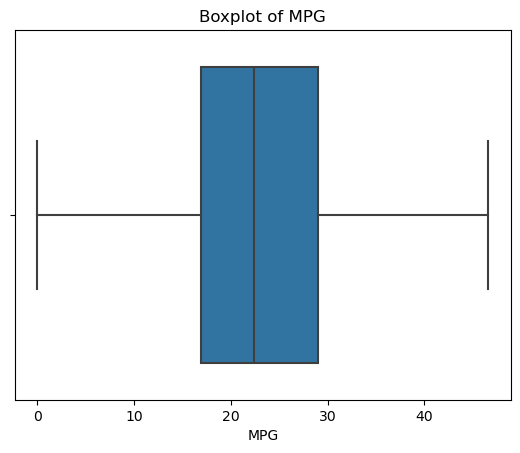

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=cars_df['MPG'])
plt.title("Boxplot of MPG")
plt.show()


Q2 (Median): middle line of the box

Q1 and Q3: the lower and upper end of the box

IQR (Interquartile Range): the difference between Q1 and Q3.

Dots (outlayers): points dissociated from the whiskers.

It illustrates the datase MPG (Miles Per Gallon).

Data points beyond the whiskers (often denoted as dots) are categorized as outliers.

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

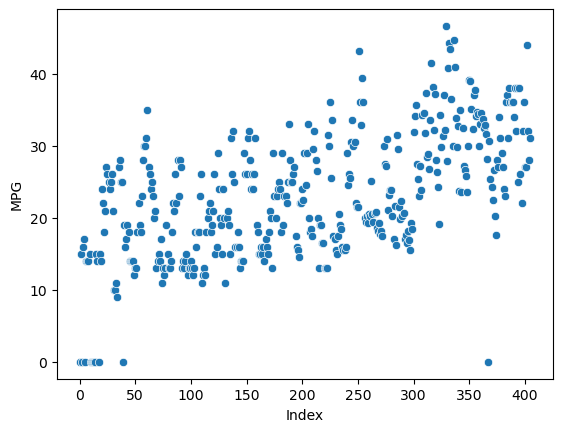

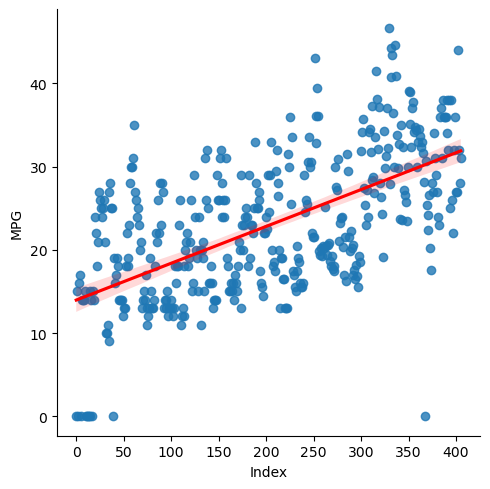

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt


cars_df_plot = cars_df.copy()
cars_df_plot['Index'] = cars_df_plot.index
sns.scatterplot(data=cars_df_plot, x='Index', y='MPG')
sns.lmplot(data=cars_df_plot, x='Index', y='MPG', line_kws={"color": "red"})

plt.xlabel("Index")
plt.ylabel("MPG")
plt.show()


Scatter plot contains the actual value of individual datapoint as well as its index (row number) alongside its MPG value. Once you throw in a regression line, you can see the overall linear relationship in the data.

Dot: A single dot represents a single car's MPG value

Red line: Best-fit line representing the trend.Summary statistics for the series shown in the best-fit line.

It lets you graphically visualize any clusters, patterns, or outliers.

Outliers will show up as points substantially above or below the red line and distinct from the trajectory.

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [233]:
from scipy.stats import zscore

cars_df['zscore'] = zscore(cars_df['MPG'])
cars_df[['Car', 'MPG', 'zscore']].head()


,Car,MPG,zscore
0,Chevrolet Chevelle Malibu,0.0,-2.664308
1,Buick Skylark 320,15.0,-0.921078
2,Plymouth Satellite,0.0,-2.664308
3,AMC Rebel SST,16.0,-0.804863
4,Ford Torino,17.0,-0.688647


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [234]:
cars_df_no_outliers_z = cars_df[cars_df['zscore'].abs() < 3]
cars_df_no_outliers_z.head()


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,zscore
0,Chevrolet Chevelle Malibu,0.0,8,307.0,130.0,3504.,12.0,70,US,-2.664308
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US,-0.921078
2,Plymouth Satellite,0.0,8,318.0,150.0,3436.,11.0,70,US,-2.664308
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US,-0.804863
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US,-0.688647


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [235]:
Q1 = cars_df['MPG'].quantile(0.25)
Q3 = cars_df['MPG'].quantile(0.75)
IQR = Q3 - Q1
print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)


Q1: 16.924999999999997 Q3: 29.0 IQR: 12.075000000000003


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [236]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -1.187500000000007
Upper Bound: 47.112500000000004


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [237]:
cars_df_no_outliers_iqr = cars_df[(cars_df['MPG'] >= lower_bound) & (cars_df['MPG'] <= upper_bound)]
cars_df_no_outliers_iqr.head()


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,zscore
0,Chevrolet Chevelle Malibu,0.0,8,307.0,130.0,3504.,12.0,70,US,-2.664308
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US,-0.921078
2,Plymouth Satellite,0.0,8,318.0,150.0,3436.,11.0,70,US,-2.664308
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US,-0.804863
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US,-0.688647


### requirements.txt

The dependencies used to run this notebook were saved using:

```bash
pip freeze > requirements.txt
